<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson03_pubchempy/lecture_note_pubchem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pubchem

# 0. 環境表示

In [1]:
# google colabolatoryでpubchempyのインストール
!pip install pubchempy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import platform
# 使用しているOSを表示
platform.platform()

'Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic'

In [3]:
# pythonのversionを表示
!python -V

Python 3.7.14


In [4]:
import pubchempy as pcp
# pcpと略すのが一般的
# pubchemのversionを表示
pcp. __version__

'1.0.4'

In [5]:
import pandas as pd
# pdと略すのが一般的
# pandasのversionを表示
pd.__version__

'1.3.5'

# 1. pubchemの基本的な使い方

### 検索

In [6]:
import pubchempy as pcp
compounds = pcp.get_compounds('quercetine', 'name')

In [7]:
type(compounds)

list

In [8]:
compounds

[Compound(5280343)]

In [9]:
type(compounds[0])

pubchempy.Compound

### 検索結果の確認

In [10]:
#分子式
MF = compounds[0].molecular_formula
MF
#文字列で格納されている。

'C15H10O7'

In [11]:
#分子量
MW = compounds[0].molecular_weight
MW
#文字列で格納されている。

'302.23'

In [12]:
#同位体や不斉中心についての記述を含むSMILES
compounds[0].isomeric_smiles

'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O'

In [13]:
#同意語
# 名前の中にCAS番号も入っている。
# pubchemは幅広く検索できるようになっている。
compounds[0].synonyms

['quercetin',
 '117-39-5',
 'Meletin',
 'Sophoretin',
 'Quercetine',
 'Xanthaurine',
 'Quercetol',
 'Quertine',
 "3,3',4',5,7-Pentahydroxyflavone",
 'Quercitin',
 '2-(3,4-Dihydroxyphenyl)-3,5,7-trihydroxy-4H-chromen-4-one',
 'Flavin meletin',
 "3,5,7,3',4'-Pentahydroxyflavone",
 'Cyanidelonon 1522',
 'T-Gelb bzw. grun 1',
 'Quertin',
 'C.I. Natural Yellow 10',
 'Quercetin content',
 'Kvercetin',
 'C.I. Natural red 1',
 'C.I. 75670',
 '2-(3,4-Dihydroxyphenyl)-3,5,7-trihydroxy-4H-1-benzopyran-4-one',
 '2-(3,4-dihydroxyphenyl)-3,5,7-trihydroxychromen-4-one',
 "3',4',5,7-Tetrahydroxyflavan-3-ol",
 '4H-1-Benzopyran-4-one, 2-(3,4-dihydroxyphenyl)-3,5,7-trihydroxy-',
 'C.I. Natural yellow 10 & 13',
 'Cyanidenolon 1522',
 'NSC 9219',
 'CCRIS 1639',
 'HSDB 3529',
 "Flavone, 3,3',4',5,7-pentahydroxy-",
 'NCI-C60106',
 'UNII-9IKM0I5T1E',
 "3',4',5,7-tetrahydroxyflavon-3-ol",
 '3,5,7-Trihydroxy-2-(3,4-dihydroxyphenyl)-4H-chromen-4-on',
 'CHEBI:16243',
 'AI3-26018',
 'NSC9219',
 'CHEMBL50',
 'MFCD0

In [14]:
# iupac名の確認
compounds[0].iupac_name

'2-(3,4-dihydroxyphenyl)-3,5,7-trihydroxychromen-4-one'

### help関数で確認できる

In [15]:
# 使い方や、どんな関数があるのかを確認できる。
help(compounds[0])

Help on Compound in module pubchempy object:

class Compound(builtins.object)
 |  Compound(record)
 |  
 |  Corresponds to a single record from the PubChem Compound database.
 |  
 |  The PubChem Compound database is constructed from the Substance database using a standardization and deduplication
 |  process. Each Compound is uniquely identified by a CID.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, record)
 |      Initialize with a record dict from the PubChem PUG REST service.
 |      
 |      For most users, the ``from_cid()`` class method is probably a better way of creating Compounds.
 |      
 |      :param dict record: A compound record returned by the PubChem PUG REST service.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  to_dict(self, properties=None)
 |      Return a dictionary containing Compound data. Optionally specify a list of the desired properties.
 |      
 |      synonyms, aids and sids

# 2. 発展的な検索方法（部分構造検索、CIDからの検索）

### smilesでの検索(得られた化合物のiupac_nameを表示)

In [16]:
compounds_from_smiles = pcp.get_compounds('C1=CC2=C(C3=C(C=CC=N3)C=C2)N=C1', 'smiles')
compounds_from_smiles[0].iupac_name

'1,10-phenanthroline'

### 分子式で検索

In [17]:
compounds_C20H41Br = pcp.get_compounds('C20H41Br', 'formula')

In [18]:
len(compounds_C20H41Br)

43

In [19]:
compounds_C20H41Br[30].iupac_name

'6-bromo-6-butyl-7-methylpentadecane'

### SDFファイルの表示

In [20]:
sdf = pcp.get_sdf('quercetine', 'name')
print(sdf)

5280343
  -OEChem-10082222362D

 32 34  0     0  0  0  0  0  0999 V2000
    6.0682   -0.2704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.8003    1.7296    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.3198    2.7642    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.0682    2.7296    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5381   -0.2945    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.6663   -2.7704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   10.3984   -1.7704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.2022    1.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2022    0.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9343    0.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.8003   -0.2704    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9343    1.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0682    1.7296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.3083    1.76

### cidから取得

In [21]:
compound_cid = pcp.Compound.from_cid(6819)
compound_cid.iupac_name

'2-O-(2-butoxy-2-oxoethyl) 1-O-butyl benzene-1,2-dicarboxylate'

# 3. get_propertiesの使い方とpubchemとpandasの連携

In [22]:
#1つの化合物の名前で複数のデータを確認する。
# リストで
compound = "alanine"
properties = ['iupacname', 'molecularformula', 'molecularweight', 'canonicalsmiles']
pcp.get_properties(properties, compound, 'name', as_dataframe=True)

,MolecularFormula,MolecularWeight,CanonicalSMILES,IUPACName
CID,,,,
5950,C3H7NO2,89.09,CC(C(=O)O)N,(2S)-2-aminopropanoic acid
449619,C3H8NO2+,90.10,CC(C(=O)O)[NH3+],[(1S)-1-carboxyethyl]azanium
7311724,C3H7NO2,89.09,CC(C(=O)[O-])[NH3+],(2S)-2-azaniumylpropanoate
155817681,C3H6NO2-,88.09,[CH2-]C(C(=O)O)N,(2S)-2-aminopropanoic acid


In [23]:
# 調べたい項目を設定、今回はCAS番号で調べています。
# 99-99-99は、エラーが出る架空の番号
compound_list = ['6921-64-8', '95-65-8', '99-99-99', '494-99-5']
properties = ['IUPACName', 'IsomericSMILES']

In [24]:
# 100個くらいまでなら、この方法で行っても時間は、それほどかからない。
# 繋げるたびに前のデータを呼び出すので、concatで繋げていくのは遅い。

import sys
import pandas as pd

df_pub = pd.DataFrame()
for compound in compound_list:
    try:
        temp = pcp.get_properties(properties, compound, 'name', as_dataframe=True)
        #as_dataframe=True とすることでpandas dataframe として情報を取得可能
        temp['CAS'] = compound
        df_pub = pd.concat([df_pub,temp],axis=0,join='outer',sort=True)
    except:
        print("--------error-----------")
        print(compound)
        print(sys.exc_info())
        pass
    
df_pub

--------error-----------
99-99-99
(<class 'KeyError'>, KeyError('CID'), <traceback object at 0x7fc3e4ead500>)


,CAS,IUPACName,IsomericSMILES
CID,,,
81338,6921-64-8,1-(2-hydroxy-4-methylphenyl)ethanone,CC1=CC(=C(C=C1)C(=O)C)O
7249,95-65-8,"3,4-dimethylphenol",CC1=C(C=C(C=C1)O)C
68126,494-99-5,"1,2-dimethoxy-4-methylbenzene",CC1=CC(=C(C=C1)OC)OC


## pubchemとpandasの連携 (分子式検索)

In [25]:
#分子式でいろんな化合物も検索できる。
df = pcp.get_compounds('C20H41Br', 'formula', as_dataframe=True)

In [26]:
df

,atom_stereo_count,atoms,bond_stereo_count,bonds,cactvs_fingerprint,canonical_smiles,charge,complexity,conformer_id_3d,conformer_rmsd_3d,...,pharmacophore_features_3d,record,rotatable_bond_count,shape_fingerprint_3d,shape_selfoverlap_3d,tpsa,undefined_atom_stereo_count,undefined_bond_stereo_count,volume_3d,xlogp
cid,,,,,,,,,,,,,,,,,,,,,
20271,0,"[{'aid': 1, 'number': 35, 'element': 'Br', 'x'...",0,"[{'aid1': 1, 'aid2': 20, 'order': 1}, {'aid1':...",1111000001111000000000000000000000000000000100...,CCCCCCCCCCCCCCCCCCCCBr,0,167,None,None,...,None,"{'id': {'id': {'cid': 20271}}, 'atoms': {'aid'...",18,None,None,0,0,0,None,11.4
23148745,1,"[{'aid': 1, 'number': 35, 'element': 'Br', 'x'...",0,"[{'aid1': 1, 'aid2': 10, 'order': 1}, {'aid1':...",1111000001111000000000000000000000000000000100...,CCCCCCCCCCC(CCCCCCCC)CBr,0,179,None,None,...,None,"{'id': {'id': {'cid': 23148745}}, 'atoms': {'a...",17,None,None,0,1,0,None,10.6
10808570,3,"[{'aid': 1, 'number': 35, 'element': 'Br', 'x'...",0,"[{'aid1': 1, 'aid2': 21, 'order': 1}, {'aid1':...",1111000001111000000000000000000000000000000100...,CC(C)CCCC(C)CCCC(C)CCCC(C)CCBr,0,212,None,None,...,None,"{'id': {'id': {'cid': 10808570}}, 'atoms': {'a...",14,None,None,0,3,0,None,9.9
14350915,3,"[{'aid': 1, 'number': 35, 'element': 'Br', 'x'...",0,"[{'aid1': 1, 'aid2': 21, 'order': 1}, {'aid1':...",1111000001111000000000000000000000000000000100...,CC(C)CCCC(C)CCCC(C)CCCC(C)CCBr,0,212,None,None,...,None,"{'id': {'id': {'cid': 14350915}}, 'atoms': {'a...",14,None,None,0,1,0,None,9.9
154322467,2,"[{'aid': 1, 'number': 35, 'element': 'Br', 'x'...",0,"[{'aid1': 1, 'aid2': 12, 'order': 1}, {'aid1':...",1111000001111000000000000000000000000000000100...,CCCCCCCCCCCCC(CC)CC(CC)CBr,0,190,None,None,...,None,"{'id': {'id': {'cid': 154322467}}, 'atoms': {'...",16,None,None,0,2,0,None,10.3
154285858,1,"[{'aid': 1, 'number': 35, 'element': 'Br', 'x'...",0,"[{'aid1': 1, 'aid2': 2, 'order': 1, 'style': 3...",1111000001111000000000000000000000000000000100...,CCCCCCCCCCCCC(CCC)(C(C)(C)C)Br,0,229,None,None,...,None,"{'id': {'id': {'cid': 154285858}}, 'atoms': {'...",14,None,None,0,1,0,None,10.0
154147689,3,"[{'aid': 1, 'number': 35, 'element': 'Br', 'x'...",0,"[{'aid1': 1, 'aid2': 5, 'order': 1, 'style': 3...",1111000001111000000000000000000000000000000100...,CCCCCCCCC(CC(C)CC)C(CCCCC)Br,0,202,None,None,...,None,"{'id': {'id': {'cid': 154147689}}, 'atoms': {'...",15,None,None,0,3,0,None,10.0
153970566,0,"[{'aid': 1, 'number': 35, 'element': 'Br', 'x'...",0,"[{'aid1': 1, 'aid2': 3, 'order': 1}, {'aid1': ...",1111000001111000000000000000000000000000000100...,CCCCC(CC)(CCCC)C(CCCC)(CCCC)Br,0,218,None,None,...,None,"{'id': {'id': {'cid': 153970566}}, 'atoms': {'...",14,None,None,0,0,0,None,9.4
153855828,1,"[{'aid': 1, 'number': 35, 'element': 'Br', 'x'...",0,"[{'aid1': 1, 'aid2': 14, 'order': 1, 'style': ...",1111000001111000000000000000000000000000000100...,CCCCCCCCCCCCCCCCC(CCC)Br,0,179,None,None,...,None,"{'id': {'id': {'cid': 153855828}}, 'atoms': {'...",17,None,None,0,1,0,None,10.6


In [27]:
df.columns

Index(['atom_stereo_count', 'atoms', 'bond_stereo_count', 'bonds',
       'cactvs_fingerprint', 'canonical_smiles', 'charge', 'complexity',
       'conformer_id_3d', 'conformer_rmsd_3d', 'coordinate_type',
       'covalent_unit_count', 'defined_atom_stereo_count',
       'defined_bond_stereo_count', 'effective_rotor_count_3d', 'elements',
       'exact_mass', 'feature_selfoverlap_3d', 'fingerprint',
       'h_bond_acceptor_count', 'h_bond_donor_count', 'heavy_atom_count',
       'inchi', 'inchikey', 'isomeric_smiles', 'isotope_atom_count',
       'iupac_name', 'mmff94_energy_3d', 'mmff94_partial_charges_3d',
       'molecular_formula', 'molecular_weight', 'monoisotopic_mass',
       'multipoles_3d', 'pharmacophore_features_3d', 'record',
       'rotatable_bond_count', 'shape_fingerprint_3d', 'shape_selfoverlap_3d',
       'tpsa', 'undefined_atom_stereo_count', 'undefined_bond_stereo_count',
       'volume_3d', 'xlogp'],
      dtype='object')

In [28]:
#分子式での調べ方
cs = pcp.get_compounds('C20H41Br', 'formula')
df_formula = pcp.compounds_to_frame(cs, properties=['isomeric_smiles', 'xlogp', 'rotatable_bond_count', ])

In [29]:
df_formula

,isomeric_smiles,xlogp,rotatable_bond_count
cid,,,
20271,CCCCCCCCCCCCCCCCCCCCBr,11.4,18
23148745,CCCCCCCCCCC(CCCCCCCC)CBr,10.6,17
10808570,CC(C)CCCC(C)CCCC(C)CCCC(C)CCBr,9.9,14
14350915,C[C@@H](CCC[C@@H](C)CCCC(C)CCBr)CCCC(C)C,9.9,14
154322467,CCCCCCCCCCCCC(CC)CC(CC)CBr,10.3,16
154285858,CCCCCCCCCCCCC(CCC)(C(C)(C)C)Br,10.0,14
154147689,CCCCCCCCC(CC(C)CC)C(CCCCC)Br,10.0,15
153970566,CCCCC(CC)(CCCC)C(CCCC)(CCCC)Br,9.4,14
153855828,CCCCCCCCCCCCCCCCC(CCC)Br,10.6,17


# 4. Download


In [30]:
pcp.download('PNG', 'asp.png', 'Aspirin', 'name')

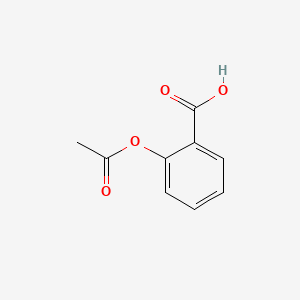

In [31]:
from IPython.display import Image, display_png
display_png(Image("asp.png"))

In [32]:
pcp.download('CSV', 'download.csv', [1,2,3], operation='property/CanonicalSMILES,IsomericSMILES')

In [33]:
df = pd.read_csv("download.csv")
df

,CID,CanonicalSMILES,IsomericSMILES
0,1,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C
1,2,CC(=O)OC(CC(=O)O)C[N+](C)(C)C,CC(=O)OC(CC(=O)O)C[N+](C)(C)C
2,3,C1=CC(C(C(=C1)C(=O)O)O)O,C1=CC(C(C(=C1)C(=O)O)O)O
